In [4]:
import keras
import re
import numpy as np
import pandas as pd

import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%matplotlib inline

In [5]:
from methods.baseline import Baseline

In [6]:
MAX_SEQUENCE_LENGTH_T = 20 # 40
MAX_SEQUENCE_LENGTH_D = 200 # 200
EMBEDDING_DIM = 300
MAX_NB_WORDS = 2000

In [7]:
DIR = 'data/processed/eclipse'
DIR_PAIRS = 'data/normalized/eclipse'

In [8]:
df_train_pair = pd.read_csv(os.path.join(DIR_PAIRS, 'eclipse_pairs.csv'))
baseline = Baseline(DIR, MAX_SEQUENCE_LENGTH_T, MAX_SEQUENCE_LENGTH_D)

In [9]:
baseline.load_ids(DIR)

In [10]:
len(baseline.bug_ids)

212512

In [11]:
%%time

bug_dir = os.path.join(DIR)
baseline.prepare_dataset(bug_dir)

Reading train data
Wall time: 1.46 s


In [12]:
baseline.load_bugs()

100%|█████████████████████████████████| 212512/212512 [16:04<00:00, 220.36it/s]


In [61]:
title_corpus = [baseline.bug_set[i]['title'] for i in tqdm(baseline.bug_ids)]
description_corpus = [baseline.bug_set[i]['description'] for i in tqdm(baseline.bug_ids)]


100%|██████████████████████████████| 212512/212512 [00:00<00:00, 241318.53it/s]

In [40]:
title_length = [len(baseline.bug_set[i]['title'].split(' ')) for i in tqdm(baseline.bug_ids)]
description_length = [len(baseline.bug_set[i]['description'].split(' ')) for i in tqdm(baseline.bug_ids)]


100%|███████████████████████████████| 212512/212512 [00:05<00:00, 35529.66it/s]

(<matplotlib.axes._subplots.AxesSubplot at 0xb9cbaf8b38>,                title
 count  212512.000000
 mean        8.945565
 std         3.599293
 min         1.000000
 25%         6.000000
 50%         9.000000
 75%        11.000000
 max        47.000000)

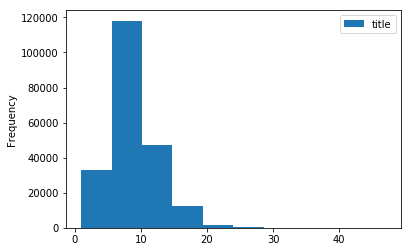

In [53]:
df_title = pd.DataFrame(title_length, columns=['title'])
df_title.plot.hist(), df_title.describe()

(<matplotlib.axes._subplots.AxesSubplot at 0xb9cc19ba58>,          description
 count  212512.000000
 mean      174.112869
 std       468.717641
 min         1.000000
 25%        37.000000
 50%        69.000000
 75%       136.000000
 max     63126.000000)

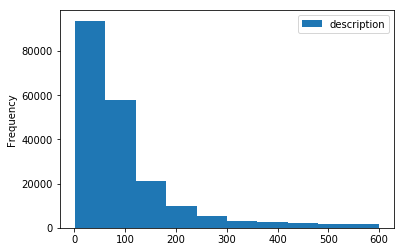

In [52]:
df_desc = pd.DataFrame(description_length, columns=['description'])
df_desc[df_desc['description'] <= 600].plot.hist(), df_desc.describe()

### Word cloud title

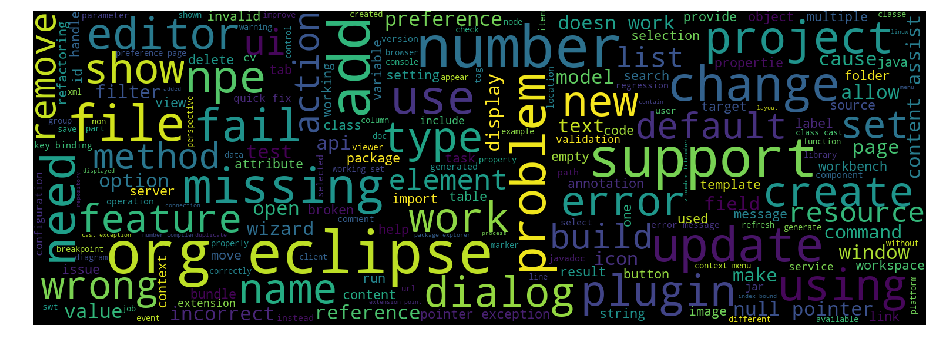

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(" ".join(title_corpus))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word cloud description

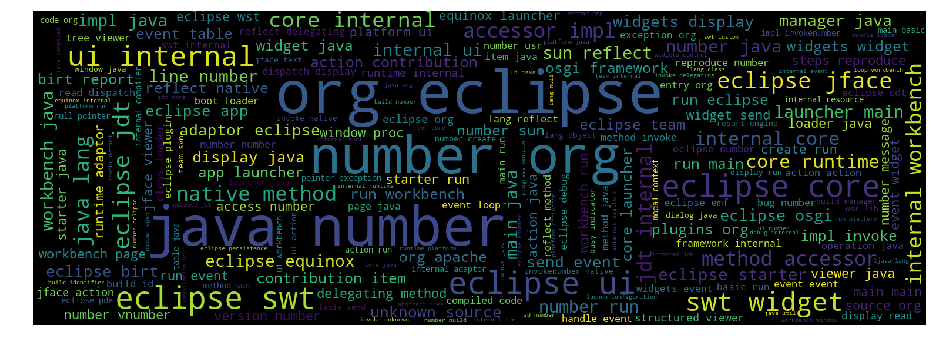

In [62]:
wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(" ".join(description_corpus))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()